In [242]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt    
    

In [247]:
# Isolate data items
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL', 'MCO']
Date_Range_B_Dates = ['20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]


Flight Counter: 1
Airline Flight#: DL1675
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T12:59:00.000
Actual Departure: 2019-01-22T20:39:00.000
Flight Departure Delayed by (H:M:S): 7:40:00
Departure Time Delta (minutes): 460.0


Flight Counter: 2
Airline Flight#: DL9936
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:00:00.000
Actual Departure: 2019-01-22T17:52:00.000
Flight Departure Delayed by (H:M:S): 4:52:00
Departure Time Delta (minutes): 292.0


Flight Counter: 3
Airline Flight#: DL1311
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:22:00.000
Actual Departure: 2019-01-22T14:10:00.000
Flight Departure Delayed by (H:M:S): 0:48:00
Departure Time Delta (minutes): 48.0


Flight Counter: 4
Airline Flight#: DL1992
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:41:00.000
Actual Departure: 2019-01-22T14:46:00.000
Flight Departure Delayed by (H:M:S): 1:05:00
Departure Time Delta (minutes): 65.0


Flight Counter: 5
Airline 

Flight Counter: 106
Airline Flight#: DL2314
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:48:00.000
Actual Departure: 2019-01-22T16:08:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 107
Airline Flight#: DL1074
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:49:00.000
Actual Departure: 2019-01-22T15:48:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 108
Airline Flight#: DL1481
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:50:00.000
Actual Departure: 2019-01-22T15:45:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 109
Airline Flight#: DL788
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:54:00.000
Actual Departure: 2019-01-22T15:51:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 110
Airline Fl

Flight Counter: 172
Airline Flight#: DL2784
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:30:00.000
Actual Departure: 2019-01-22T17:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 173
Airline Flight#: DL2951
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:30:00.000
Actual Departure: 2019-01-22T17:35:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 174
Airline Flight#: DL2194
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:32:00.000
Actual Departure: 2019-01-22T17:56:00.000
Flight Departure Delayed by (H:M:S): 0:24:00
Departure Time Delta (minutes): 24.0


Flight Counter: 175
Airline Flight#: DL117
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:34:00.000
Actual Departure: 2019-01-22T17:32:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 176
Airline 

Flight Counter: 250
Airline Flight#: DL1483
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:23:00.000
Actual Departure: 2019-01-22T19:55:00.000
Flight Departure Delayed by (H:M:S): 0:32:00
Departure Time Delta (minutes): 32.0


Flight Counter: 251
Airline Flight#: DL1742
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:24:00.000
Actual Departure: 2019-01-22T19:24:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 252
Airline Flight#: DL28
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:24:00.000
Actual Departure: 2019-01-22T19:21:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 253
Airline Flight#: DL990
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:24:00.000
Actual Departure: 2019-01-22T19:43:00.000
Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 254
Airline Flight#: DL2980
Airpo

Flight Counter: 335
Airline Flight#: DL2270
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:33:00.000
Actual Departure: 2019-01-23T14:51:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 336
Airline Flight#: DL1831
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:36:00.000
Actual Departure: 2019-01-23T14:31:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 337
Airline Flight#: DL852
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:40:00.000
Actual Departure: 2019-01-23T14:37:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 338
Airline Flight#: DL2071
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:41:00.000
Actual Departure: 2019-01-23T14:41:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 339
Airline Flight#: DL769
Airport

Flight Counter: 398
Airline Flight#: DL336
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:46:00.000
Actual Departure: 2019-01-23T16:07:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 399
Airline Flight#: DL2314
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:48:00.000
Actual Departure: 2019-01-23T15:52:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 400
Airline Flight#: DL1074
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:49:00.000
Actual Departure: 2019-01-23T15:52:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 401
Airline Flight#: DL1481
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:50:00.000
Actual Departure: 2019-01-23T16:02:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 402
Air

Airline Flight#: DL925
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:45:00.000
Actual Departure: 2019-01-23T17:54:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 477
Airline Flight#: DL2186
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:45:00.000
Actual Departure: 2019-01-23T17:45:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 478
Airline Flight#: DL1725
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:46:00.000
Actual Departure: 2019-01-23T17:43:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 479
Airline Flight#: DL2438
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:46:00.000
Actual Departure: 2019-01-23T17:43:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 480
Airline Flight#: DL1672
Airport: ATL
Date: 2019-01-

Flight Counter: 559
Airline Flight#: DL2017
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:31:00.000
Actual Departure: 2019-01-23T19:35:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 560
Airline Flight#: DL1259
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:31:00.000
Actual Departure: 2019-01-23T19:27:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 561
Airline Flight#: DL2097
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:32:00.000
Actual Departure: 2019-01-23T19:32:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 562
Airline Flight#: DL2697
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:33:00.000
Actual Departure: 2019-01-23T19:33:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 563
Airline Flight#: DL1560
Airport: ATL
Date: 2019-01

Flight Counter: 621
Airline Flight#: DL2026
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:10:00.000
Actual Departure: 2019-01-24T14:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 622
Airline Flight#: DL1681
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:10:00.000
Actual Departure: 2019-01-24T14:22:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 623
Airline Flight#: DL1673
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:12:00.000
Actual Departure: 2019-01-24T14:10:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 624
Airline Flight#: DL807
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:14:00.000
Actual Departure: 2019-01-24T14:18:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 625
Airline 

Flight Counter: 704
Airline Flight#: DL2314
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:48:00.000
Actual Departure: 2019-01-24T16:11:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 705
Airline Flight#: DL1074
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:49:00.000
Actual Departure: 2019-01-24T16:02:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 706
Airline Flight#: DL1481
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:50:00.000
Actual Departure: 2019-01-24T16:04:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 707
Airline Flight#: DL788
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:54:00.000
Actual Departure: 2019-01-24T16:02:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 708
Ai

Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:46:00.000
Actual Departure: 2019-01-24T17:45:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 784
Airline Flight#: DL2438
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:46:00.000
Actual Departure: 2019-01-24T17:45:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 785
Airline Flight#: DL1672
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:48:00.000
Actual Departure: 2019-01-24T19:30:00.000
Flight Departure Delayed by (H:M:S): 1:42:00
Departure Time Delta (minutes): 102.0


Flight Counter: 786
Airline Flight#: DL2419
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:48:00.000
Actual Departure: 2019-01-24T18:21:00.000
Flight Departure Delayed by (H:M:S): 0:33:00
Departure Time Delta (minutes): 33.0


Flight Counter: 787
Airline Flight#: DL393
Airport: ATL
Date: 2019-01-24
Scheduled

Flight Counter: 871
Airline Flight#: DL1122
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:31:00.000
Actual Departure: 2019-01-24T19:45:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 872
Airline Flight#: DL2097
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:32:00.000
Actual Departure: 2019-01-24T19:28:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 873
Airline Flight#: DL2697
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:33:00.000
Actual Departure: 2019-01-24T20:15:00.000
Flight Departure Delayed by (H:M:S): 0:42:00
Departure Time Delta (minutes): 42.0


Flight Counter: 874
Airline Flight#: DL2006
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:35:00.000
Actual Departure: 2019-01-24T19:34:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 875
Airlin

Flight Counter: 939
Airline Flight#: DL1178
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:30:00.000
Actual Departure: 2019-01-25T14:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 940
Airline Flight#: DL2876
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:30:00.000
Actual Departure: 2019-01-25T15:45:00.000
Flight Departure Delayed by (H:M:S): 1:15:00
Departure Time Delta (minutes): 75.0


Flight Counter: 941
Airline Flight#: DL2389
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:30:00.000
Actual Departure: 2019-01-25T14:53:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 942
Airline Flight#: DL705
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:30:00.000
Actual Departure: 2019-01-25T14:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 943
Airline Flight#: DL826
Airp

Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:40:00.000
Actual Departure: 2019-01-25T15:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1006
Airline Flight#: DL889
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:44:00.000
Actual Departure: 2019-01-25T15:40:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1007
Airline Flight#: DL2451
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:45:00.000
Actual Departure: 2019-01-25T15:49:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1008
Airline Flight#: DL336
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:46:00.000
Actual Departure: 2019-01-25T16:04:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 1009
Airline Flight#: DL2094
Airport: ATL
Date: 2019-01-25
Scheduled Depar

Flight Counter: 1097
Airline Flight#: DL393
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:50:00.000
Actual Departure: 2019-01-25T18:12:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 1098
Airline Flight#: DL795
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:50:00.000
Actual Departure: 2019-01-25T17:46:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1099
Airline Flight#: DL151
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:51:00.000
Actual Departure: 2019-01-25T19:00:00.000
Flight Departure Delayed by (H:M:S): 1:09:00
Departure Time Delta (minutes): 69.0


Flight Counter: 1100
Airline Flight#: DL2176
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:51:00.000
Actual Departure: 2019-01-25T17:49:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1101
Airl

Departure Time Delta (minutes): 63.0


Flight Counter: 1172
Airline Flight#: DL2445
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:29:00.000
Actual Departure: 2019-01-25T19:40:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 1173
Airline Flight#: DL2966
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:30:00.000
Actual Departure: 2019-01-25T19:40:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 1174
Airline Flight#: DL1918
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:30:00.000
Actual Departure: 2019-01-25T19:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1175
Airline Flight#: DL1307
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:31:00.000
Actual Departure: 2019-01-25T19:31:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Fli

Flight Counter: 1256
Airline Flight#: DL2190
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:23:00.000
Actual Departure: 2019-01-24T18:03:00.000
Flight Departure Delayed by (H:M:S): 2:40:00
Departure Time Delta (minutes): 160.0


Flight Counter: 1257
Airline Flight#: DL1095
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:25:00.000
Actual Departure: 2019-01-24T15:24:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1258
Airline Flight#: DL1818
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:36:00.000
Actual Departure: 2019-01-24T18:12:00.000
Flight Departure Delayed by (H:M:S): 2:36:00
Departure Time Delta (minutes): 156.0


Flight Counter: 1259
Airline Flight#: DL2105
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:14:00.000
Actual Departure: 2019-01-24T17:23:00.000
Flight Departure Delayed by (H:M:S): 1:09:00
Departure Time Delta (minutes): 69.0


Flight Counter: 1

In [248]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()







Departure Summary for Date Range B

Total Departures Early: 547
Total Departures On Time: 127
Total Departures Delayed: 626
Total Departures: 1300



,Early,On Time,Delayed
0,547,127,626


In [249]:
# Describe Date Range B
Date_Range_B_df.describe()



,Delay
count,1300.000000
mean,17.196154
std,51.856415
min,-14.000000
25%,-2.000000
50%,0.000000
75%,15.000000
max,656.000000


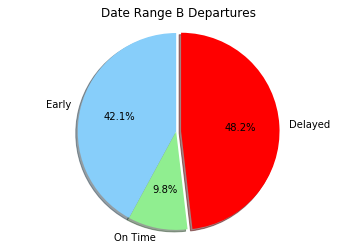

In [250]:
# Plot Date Range B Departures

Date_Range_B_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_B_Labels = ["Early", "On Time", "Delayed"]
colors = ["lightskyblue", "lightgreen", "red"]
explode = (0, 0, 0.05)

plt.title("Date Range B Departures")
plt.pie(Date_Range_B_Summary, autopct="%1.1f%%", explode=explode, labels=Date_Range_B_Labels, colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [227]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B